# Part II - (Students Success Factors )
## by (Mojde Bay)





## Investigation Overview

>For the presentation, I focus on just the influence of the four main features on students' academic performance.
I start with the parents' education level, followed by the parent's job earnings, then plot the relationship between family structure and students' performance.
I've made sure to use different color palettes for each quality variable to make sure it is clear that they're different between plots.




## Dataset Overview

>PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the
PISA 2012 assessment of reading, mathematics, and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of the creative problem solving and 18 in an assessment of financial literacy.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe

pisa = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1')

# make a copy of the dataset so as to keep the original one intact.
pisa_clean = pisa.copy()
# Cleaning up the 'CNT' column

#'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)' should be renamed as 'United States of America'.
pisa_clean.loc[pisa_clean['CNT']=='Florida (USA)', 'CNT'] = 'United States of America'
pisa_clean.loc[pisa_clean['CNT']=='Connecticut (USA)', 'CNT'] = 'United States of America'
pisa_clean.loc[pisa_clean['CNT']=='Massachusetts (USA)', 'CNT'] = 'United States of America'

# 'Perm(Russian Federation)' should be renamed as 'Russian Federation'.
pisa_clean.loc[pisa_clean['CNT']=='Perm(Russian Federation)', 'CNT'] = 'Russian Federation'


pisa_clean[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].describe()
pisa_clean['Avg_Math_Literacy'] = pisa_clean[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)
pisa_clean['Avg_Scientific_Literacy'] = pisa_clean[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)
pisa_clean['Avg_Reading_Literacy'] = pisa_clean[['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)
# calculate an academic average for each student
pisa_clean['Avg_academia'] = (pisa_clean.Avg_Math_Literacy + pisa_clean.Avg_Scientific_Literacy + pisa_clean.Avg_Reading_Literacy)/3

pisa_clean['Avg_edu_mins'] = pisa_clean[['LMINS','MMINS','SMINS']].mean(axis=1)

# identify columns of interest and appropriate column names
cols = {'STIDSTD':'student_id',
        'ST04Q01':'gender',
        'OECD':'oecd',
        'NC':'country',
        'ST05Q01':'preschool',
        'ST06Q01':'age_edu_start',
        'IMMIG':'immigration',
        'EC06Q01':'age_lang_start',
        'HISCED':'parent_edu',
        'HISEI':'parent_occ', 
        'ESCS':'status_index',
        'FAMSTRUC':'fam_struct',
        'HEDRES':'home_edu_res',
        'Avg_Math_Literacy':'avg_math_score',
        'Avg_Reading_Literacy':'avg_read_score',
        'Avg_Scientific_Literacy':'avg_science_score', 
        'LMINS':'lang_min',
        'MMINS':'math_min',
        'SMINS':'science_min',
        'TCHBEHFA':'teacher_form',
        'IC01Q01' : 'Desktop_at_Home',
        'IC01Q02' : 'Portable_Laptop_at_Home',
        'IC01Q03' : 'Tablet_Computer_at_Home',  
        'IC01Q04' : 'Internet_Connection',   
        'IC01Q05' : 'Video_Games_Console',  
        'IC01Q06' : 'at_Home_Cell_phone_w/o_Internet',
        'IC01Q07' : 'at_Home_Cell_phone_with_Internet',
        'Avg_academia' : 'academic_avg', 
        'Avg_edu_mins': 'Avg_edu_mins'}


   


# gather only the columns of interest
subpisa = pisa_clean.loc[:,cols]
# rename columns with more descriptive titles
subpisa.rename(columns=cols, inplace=True)

# Change the object type to category for columns which should be category but are not. 
# There are some other columns like OECD, parents' education level and preschool which will transform during the exploratory process.

subpisa['gender'] = subpisa.gender.astype('category')

subpisa['Desktop_at_Home'] = subpisa.Desktop_at_Home.astype('category')
subpisa['Portable_Laptop_at_Home'] = subpisa.Portable_Laptop_at_Home.astype('category')
subpisa['Tablet_Computer_at_Home'] = subpisa.Tablet_Computer_at_Home.astype('category')
subpisa['Internet_Connection'] = subpisa.Internet_Connection.astype('category')
subpisa['Video_Games_Console'] = subpisa.Video_Games_Console.astype('category')
subpisa['at_Home_Cell_phone_w/o_Internet'] = subpisa['at_Home_Cell_phone_w/o_Internet'].astype('category')
subpisa['at_Home_Cell_phone_with_Internet'] = subpisa.at_Home_Cell_phone_with_Internet.astype('category')




> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
According to the plot, it can clearly be seen that as the deucation level of parents increases there would also be an increase in academic performance of their children with the academic average score for students with parents of no eductioan being around 400 and children with the academic average score for students with graduated parents around 500.



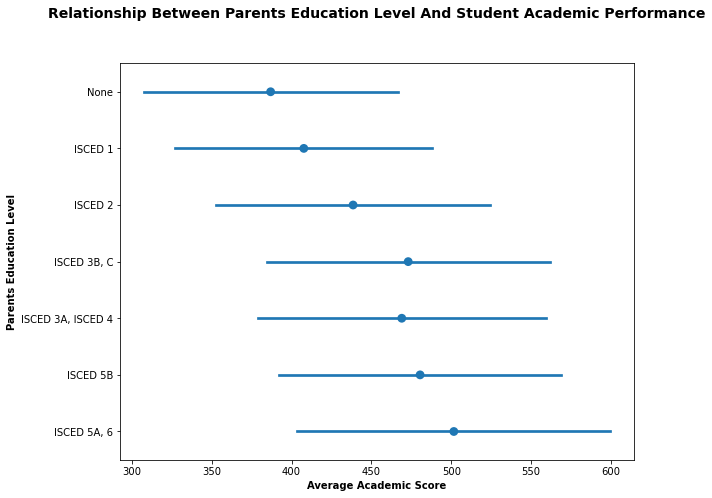

In [40]:
# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
subpisa['parent_edu'] = subpisa['parent_edu'].astype(edu_levels)

# graph the relationship between highest parental education and student math score

plt.figure(figsize = (9, 7));
sb.pointplot(data = subpisa, y = 'parent_edu', x = 'academic_avg', ci = 'sd', linestyles = "");

# Add title and format it
plt.title('relationship between parents education level and Student academic performance'.title(), y = 1.1,
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Average Academic Score'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Parents education level'.title(),
               fontsize = 10, weight = "bold")

#Optimize distance between subplots
plt.tight_layout()

## (Visualization 2)
This plot depicts the relationship between the job earning of the family and the performance of their children at school.
As parents job revenue increases, the yellow boxes(more populated areas) shift upward right in the chart which means there is a strong correlation between parents occupation and academic achievement of their children. 
However, each occupational level consists of almost all kind of scores.
It is worth noticing that extraordinary high academic scores only happen at occupation pays more than 50K per year.

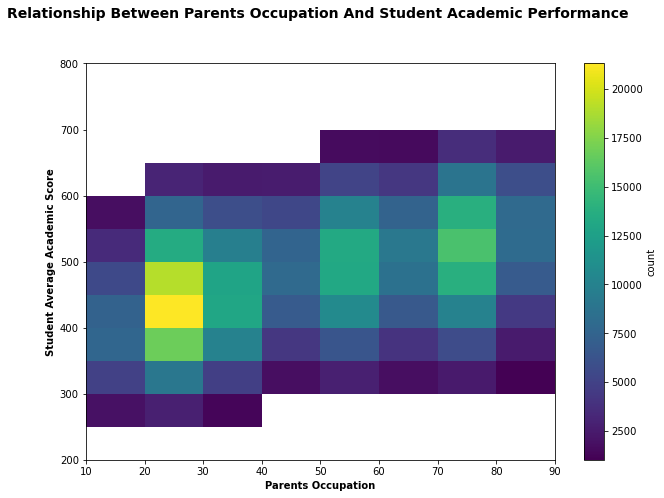

In [44]:

plt.figure(figsize = (9, 7));
# establish bin boundaries for parent occupation scores
occ_bins = np.arange(10,95,10)
# establish bin boundaries for student academic scores
score_bins = np.arange(200,850,50)

# graph the density of points relating parental occupation to student academic performance




plt.hist2d(data = subpisa, x = 'parent_occ', y = 'academic_avg', bins = [occ_bins, score_bins], cmin = 1000, cmap = 'viridis')
# Add title and format it
plt.title('Relationship between parents occupation and Student academic performance '.title(), y = 1.1,
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Parents Occupation'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Student Average Academic Score'.title(),
               fontsize = 10, weight = "bold")

plt.colorbar(label = 'count')

#Optimize distance between subplots
plt.tight_layout()


## (Visualization 3)
The other important factor while investigating the performance of the students is their family structure. According to the dataset, students living in families with at least one parent earn at least 50 scores more than other students on average.
 Children need a peaceful environment in order to be able to display their talents.

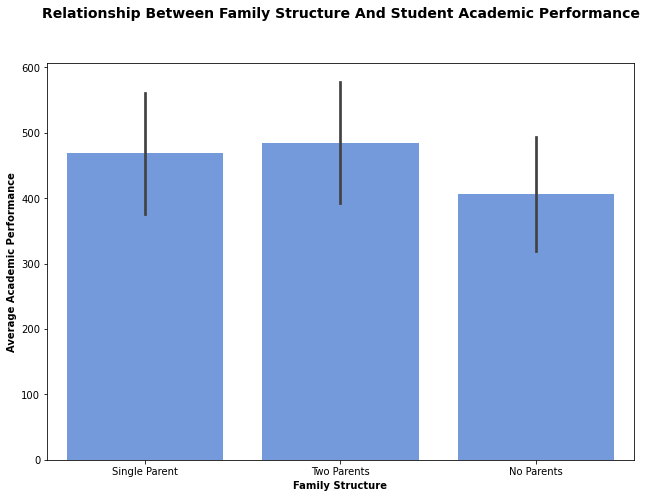

In [43]:
# plot the distribution of math scores according to family parental structure
plt.figure(figsize = (9, 7));
ax = sb.barplot(data = subpisa, x = 'fam_struct', y = 'academic_avg', ci = 'sd', color = 'cornflowerblue');
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
# Add title and format it
plt.title('relationship between family structure and Student academic performance'.title(), y = 1.1,  fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Family Structure'.title(), fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Academic Performance'.title(), fontsize = 10, weight = "bold")
#Optimize distance between subplots (I actually used it to remove this line: Text(0, 0.5, 'Average Academic Performance') )
plt.tight_layout()

## (Visualization 4)
last but not least, the country in which a child resides can play a role in his or her academic success.
Overally, countries with higher avg_status_index perform good (above 500) and countries with lower avg_status_index do not have a very good performance(below 450). However, some countries like Qatar,UAE and China go against this trend.


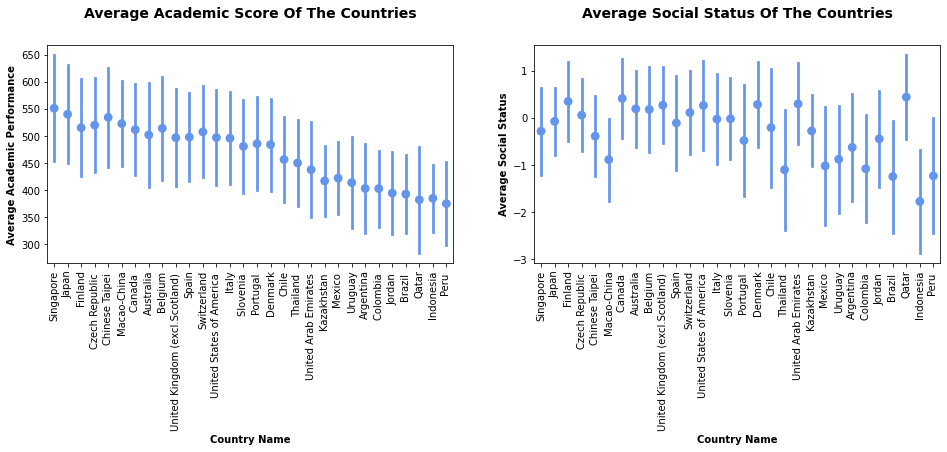

In [46]:
# gather the names of the 30 most represented countries in this study
top_countries = subpisa.country.value_counts().iloc[:30].index
# gather the mean data for each of those 25 most represented countries to use in this subset of analysis
subpisa_cnt = subpisa.groupby('country').mean()[subpisa.groupby('country').mean().index.isin(top_countries)]
subpisa_cnt.head(3)
# order top 30 countries by their average student math score
math_order = subpisa_cnt.avg_science_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))


# plot the countries in order of average academic score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = subpisa, x = 'country', y = 'academic_avg', order = math_order, ci = 'sd', color = 'cornflowerblue', linestyles = "");
# Add title and format it
plt.title('Average Academic Score of the countries'.title(),  y = 1.1,
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Country name'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Academic Performance'.title(),
               fontsize = 10, weight = "bold")
plt.xticks(rotation = 90);


# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = subpisa, x = 'country', y = 'status_index', order = math_order, ci = 'sd', color = 'cornflowerblue', linestyles = "");
# Add title and format it
plt.title('average social status of the countries'.title(), y = 1.1,
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Country name'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('average social status'.title(),
               fontsize = 10, weight = "bold")
plt.xticks(rotation = 90);



>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [47]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 709930 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Sami\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Sami\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Sami\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Sami\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\Sami\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Us

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 